# Import necessary libraries

In [328]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pickle

from train import return_vif
from train import calculate_r_squared
from train import print_ols_summary, process_data_using_vif

# Loading data and do some quick checks

In [329]:
train_path = "../data/train_set_scaled.csv"

As the convention used by us, this file is in fact a `.tsv` file, not a `.csv` one.

In [330]:
data = pd.read_csv(train_path, sep='\t', index_col=0)
data.describe()

,Log price (1 billion VND),Log area (square meters),(Log) Bedrooms,(Log) WC,Parking,For rent,Infrastructure,Facade,(Log) Number of floors,Latitude,Longitude,Cluster,Distance to center 0,Distance to center 1
count,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000
mean,-0.001738,-0.000004,0.000266,-0.000957,0.003535,-0.013460,0.014805,-0.001661,0.005422,0.005194,0.009009,0.001927,0.005168,-0.005484
std,0.999911,0.995137,0.998461,0.999261,1.000343,0.979637,0.993868,0.999346,0.998988,1.001049,1.010348,1.000953,1.001016,1.001752
min,-2.492482,-5.430634,-3.161024,-2.674523,-0.933208,-0.303083,-1.494289,-0.643026,-2.025287,-1.033570,-4.670233,-0.651906,-0.734891,-1.574407
25%,-0.618843,-0.668842,-0.351505,-1.123405,-0.933208,-0.303083,-1.494289,-0.643026,-0.698957,-0.685002,-1.098191,-0.651906,-0.693775,-1.540527
50%,-0.045966,-0.086254,0.384194,0.427712,-0.933208,-0.303083,0.669215,-0.643026,0.076897,-0.674515,0.237872,-0.651906,-0.681493,0.671649
75%,0.574668,0.584781,0.384194,0.427712,1.071573,-0.303083,0.669215,1.555148,0.627374,1.522144,0.321129,1.533962,1.521764,0.682305
max,2.624948,6.825509,6.573883,5.988411,1.071573,3.299428,0.669215,1.555148,6.898158,1.821403,4.718773,1.533962,1.900324,1.043507


In [331]:
data.shape

(4764, 14)

As preprocessed by the DE team, the model has quite good standard deviation across all features, in other word, they did their homework well, with the box plot. They, in fact, standardized the data.

Now, let's have a look at some first columns.

In [332]:
data.head()

,Log price (1 billion VND),Log area (square meters),(Log) Bedrooms,(Log) WC,Parking,For rent,Infrastructure,Facade,(Log) Number of floors,Latitude,Longitude,Cluster,Distance to center 0,Distance to center 1
ID,,,,,,,,,,,,,,
1.698602,-0.405996,-0.574633,-1.388415,-1.123405,-0.933208,-0.303083,0.669215,-0.643026,-0.698957,-0.681103,0.333202,-0.651906,-0.693789,0.678743
1.424615,1.563954,0.184162,0.954846,0.927061,-0.933208,-0.303083,0.669215,-0.643026,0.627374,-0.681988,0.287574,-0.651906,-0.690973,0.679249
-0.844066,0.167636,0.053464,0.384194,-0.216060,-0.933208,-0.303083,-1.494289,1.555148,0.076897,-0.675040,0.240336,-0.651906,-0.694568,0.671649
-1.197166,-0.736022,-0.236331,-1.388415,-1.123405,-0.933208,-0.303083,0.669215,-0.643026,-0.698957,-0.675746,0.257454,-0.651906,-0.695090,0.672527
-0.776587,-0.146298,-0.529123,2.727455,1.335058,1.071573,-0.303083,0.669215,1.555148,1.054357,1.543357,-1.236921,1.533962,1.543420,-1.541705


In [333]:
data.columns

Index(['Log price (1 billion VND)', 'Log area (square meters)',
       '(Log) Bedrooms', '(Log) WC', 'Parking', 'For rent', 'Infrastructure',
       'Facade', '(Log) Number of floors', 'Latitude', 'Longitude', 'Cluster',
       'Distance to center 0', 'Distance to center 1'],
      dtype='object')

I changed the column names, in order to have more concise names.

In [334]:
data = data.rename(columns={"Log price (1 billion VND)": "Log Price", 'Log area (square meters)': "Log Area", '(Log) Bedrooms' : "Log Bedrooms", '(Log) WC': "Log WC", '(Log) Number of floors': "Log Floors"})

The data has no NaN values, which indicates that the DE team did this homework well.

In [335]:
data.isna().sum()

Log Price               0
Log Area                0
Log Bedrooms            0
Log WC                  0
Parking                 0
For rent                0
Infrastructure          0
Facade                  0
Log Floors              0
Latitude                0
Longitude               0
Cluster                 0
Distance to center 0    0
Distance to center 1    0
dtype: int64

Let's look at the histograms created by all features.

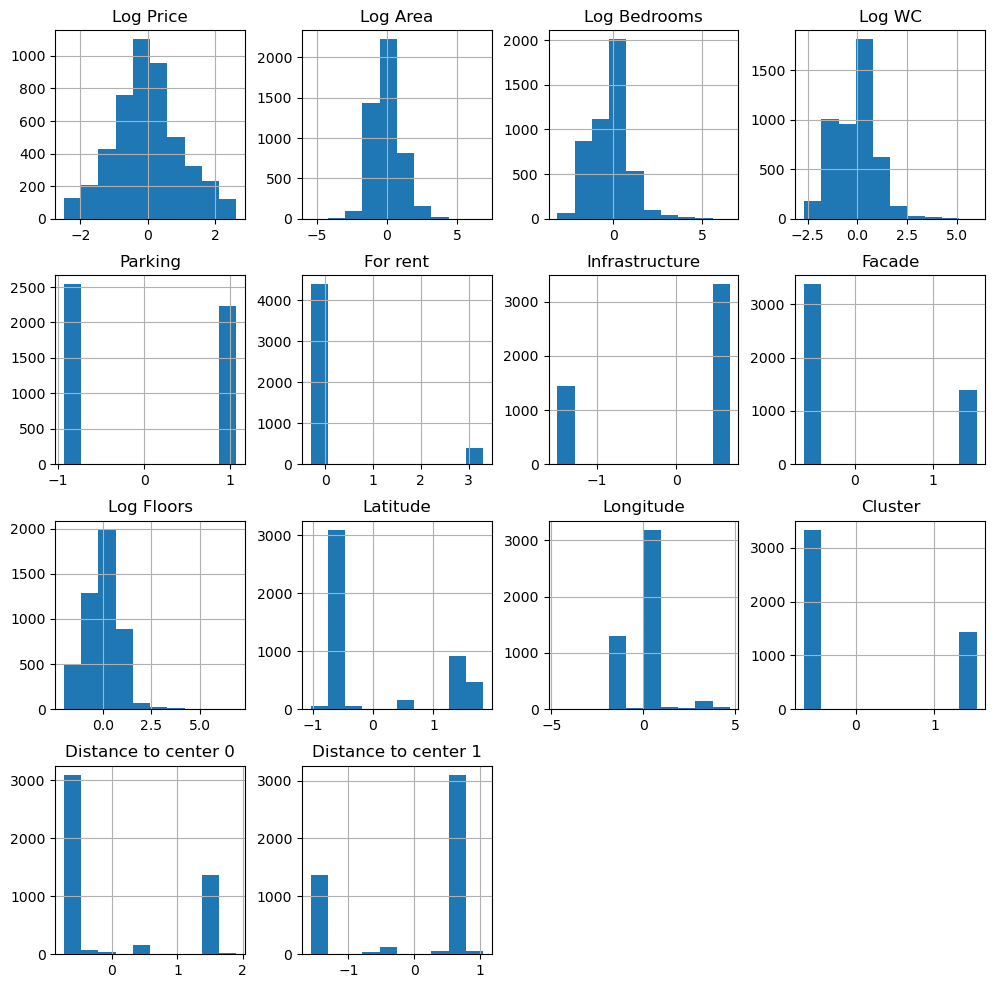

In [336]:
data.hist(figsize=(12, 12))
plt.show()

In [337]:
data.corr(numeric_only=True)

,Log Price,Log Area,Log Bedrooms,Log WC,Parking,For rent,Infrastructure,Facade,Log Floors,Latitude,Longitude,Cluster,Distance to center 0,Distance to center 1
Log Price,1.000000,0.397021,0.443603,0.451994,0.096098,0.086841,-0.062623,0.202513,0.317428,0.066024,-0.029913,0.063675,0.060028,-0.066555
Log Area,0.397021,1.000000,0.203602,0.135042,0.006635,0.079979,-0.010108,0.142143,-0.105250,-0.195869,0.278340,-0.214285,-0.189896,0.202573
Log Bedrooms,0.443603,0.203602,1.000000,0.811086,0.080304,0.138571,-0.026771,0.052145,0.537701,0.215047,-0.155548,0.209538,0.210839,-0.215068
Log WC,0.451994,0.135042,0.811086,1.000000,0.091907,0.112997,-0.026174,0.043949,0.562735,0.230470,-0.200748,0.230026,0.227629,-0.231001
Parking,0.096098,0.006635,0.080304,0.091907,1.000000,-0.044808,0.002119,-0.046723,0.107202,0.081775,-0.098596,0.086522,0.077297,-0.085301
For rent,0.086841,0.079979,0.138571,0.112997,-0.044808,1.000000,0.011510,0.044582,0.037208,-0.000113,0.049950,-0.021181,-0.002278,0.001426
Infrastructure,-0.062623,-0.010108,-0.026771,-0.026174,0.002119,0.011510,1.000000,0.013514,-0.011585,0.055063,-0.041623,0.051929,0.057809,-0.055657
Facade,0.202513,0.142143,0.052145,0.043949,-0.046723,0.044582,0.013514,1.000000,0.020066,0.156600,-0.070813,0.151502,0.157960,-0.155530
Log Floors,0.317428,-0.105250,0.537701,0.562735,0.107202,0.037208,-0.011585,0.020066,1.000000,0.332753,-0.278409,0.335129,0.330412,-0.336187
Latitude,0.066024,-0.195869,0.215047,0.230470,0.081775,-0.000113,0.055063,0.156600,0.332753,1.000000,-0.584618,0.978479,0.998217,-0.999096


In [338]:
data.corr()

,Log Price,Log Area,Log Bedrooms,Log WC,Parking,For rent,Infrastructure,Facade,Log Floors,Latitude,Longitude,Cluster,Distance to center 0,Distance to center 1
Log Price,1.000000,0.397021,0.443603,0.451994,0.096098,0.086841,-0.062623,0.202513,0.317428,0.066024,-0.029913,0.063675,0.060028,-0.066555
Log Area,0.397021,1.000000,0.203602,0.135042,0.006635,0.079979,-0.010108,0.142143,-0.105250,-0.195869,0.278340,-0.214285,-0.189896,0.202573
Log Bedrooms,0.443603,0.203602,1.000000,0.811086,0.080304,0.138571,-0.026771,0.052145,0.537701,0.215047,-0.155548,0.209538,0.210839,-0.215068
Log WC,0.451994,0.135042,0.811086,1.000000,0.091907,0.112997,-0.026174,0.043949,0.562735,0.230470,-0.200748,0.230026,0.227629,-0.231001
Parking,0.096098,0.006635,0.080304,0.091907,1.000000,-0.044808,0.002119,-0.046723,0.107202,0.081775,-0.098596,0.086522,0.077297,-0.085301
For rent,0.086841,0.079979,0.138571,0.112997,-0.044808,1.000000,0.011510,0.044582,0.037208,-0.000113,0.049950,-0.021181,-0.002278,0.001426
Infrastructure,-0.062623,-0.010108,-0.026771,-0.026174,0.002119,0.011510,1.000000,0.013514,-0.011585,0.055063,-0.041623,0.051929,0.057809,-0.055657
Facade,0.202513,0.142143,0.052145,0.043949,-0.046723,0.044582,0.013514,1.000000,0.020066,0.156600,-0.070813,0.151502,0.157960,-0.155530
Log Floors,0.317428,-0.105250,0.537701,0.562735,0.107202,0.037208,-0.011585,0.020066,1.000000,0.332753,-0.278409,0.335129,0.330412,-0.336187
Latitude,0.066024,-0.195869,0.215047,0.230470,0.081775,-0.000113,0.055063,0.156600,0.332753,1.000000,-0.584618,0.978479,0.998217,-0.999096


In [339]:
data.shape

(4764, 14)

# Linear Regression

In [340]:
X = data.drop("Log Price", axis=1)
y = data["Log Price"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=500)

In [341]:
print_ols_summary(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:              Log Price   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     198.4
Date:                Thu, 20 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:26:55   Log-Likelihood:                -5052.2
No. Observations:                4264   AIC:                         1.013e+04
Df Residuals:                    4250   BIC:                         1.022e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0013 

In [342]:
r_squared = pd.DataFrame()
r_squared["columns"] = X_train.columns
r_squared["r2"] = [calculate_r_squared(df=X_train, column=column) for column in X_train.columns]
r_squared

,columns,r2
0,Log Area,0.224383
1,Log Bedrooms,0.688984
2,Log WC,0.684767
3,Parking,0.037944
4,For rent,0.035748
5,Infrastructure,0.008790
6,Facade,0.065412
7,Log Floors,0.401880
8,Latitude,0.998922
9,Longitude,0.560525


In [343]:
X_train = process_data_using_vif(X_train)
return_vif(X_train)

,Features,VIF
0,Log Area,1.24938
1,Log Bedrooms,3.19724
2,Log WC,3.17192
3,Parking,1.02730
4,For rent,1.02980
5,Infrastructure,1.00664
6,Facade,1.06969
7,Log Floors,1.66533
8,Longitude,1.62868
9,Distance to center 0,1.63990


In [344]:
print_ols_summary(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:              Log Price   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     244.6
Date:                Thu, 20 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:26:55   Log-Likelihood:                -5094.9
No. Observations:                4264   AIC:                         1.021e+04
Df Residuals:                    4253   BIC:                         1.028e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0013 

In [345]:
X_train.drop(columns="For rent", inplace=True)
print_ols_summary(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:              Log Price   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     271.7
Date:                Thu, 20 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:26:55   Log-Likelihood:                -5095.1
No. Observations:                4264   AIC:                         1.021e+04
Df Residuals:                    4254   BIC:                         1.027e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0014 

In [346]:
X_train.drop(columns="Longitude", inplace=True)
print_ols_summary(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:              Log Price   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     305.2
Date:                Thu, 20 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:26:55   Log-Likelihood:                -5096.5
No. Observations:                4264   AIC:                         1.021e+04
Df Residuals:                    4255   BIC:                         1.027e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0018 

In [347]:
X_train.drop(columns="Distance to center 0", inplace=True)
print_ols_summary(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:              Log Price   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     348.2
Date:                Thu, 20 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:26:55   Log-Likelihood:                -5098.2
No. Observations:                4264   AIC:                         1.021e+04
Df Residuals:                    4256   BIC:                         1.026e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0019      0.012     -0.

In [348]:
columns_to_drop = list(set(data.columns) - set(X_train.columns))
columns_to_drop.remove("Log Price")
columns_to_drop

['Cluster',
 'For rent',
 'Latitude',
 'Distance to center 0',
 'Distance to center 1',
 'Longitude']

In [349]:
X_valid.columns

Index(['Log Area', 'Log Bedrooms', 'Log WC', 'Parking', 'For rent',
       'Infrastructure', 'Facade', 'Log Floors', 'Latitude', 'Longitude',
       'Cluster', 'Distance to center 0', 'Distance to center 1'],
      dtype='object')

In [350]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
X_valid.drop(columns=columns_to_drop, inplace=True)
y_predict = lin_reg.predict(X_valid)
mean_squared_error(y_valid, y_predict, squared=False)

0.7462442544219802

# Decision Tree

In [351]:
X = data.drop("Log Price", axis=1)
y = data["Log Price"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=500)

In [352]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [353]:
feature_importances = pd.DataFrame()
feature_importances["Features"] = X_train.columns
feature_importances["Importances"] = decision_tree.feature_importances_
feature_importances.sort_values("Importances", ascending=False, inplace=True)
feature_importances

,Features,Importances
0,Log Area,0.248103
1,Log Bedrooms,0.181331
9,Longitude,0.114853
11,Distance to center 0,0.101294
8,Latitude,0.091231
12,Distance to center 1,0.089378
7,Log Floors,0.073430
2,Log WC,0.048013
6,Facade,0.017532
3,Parking,0.011992


In [354]:
# list of not important features according to decision tree
decision_tree_features = feature_importances[feature_importances["Importances"] < 0.01]["Features"].tolist()
columns_to_drop.extend(decision_tree_features)

In [355]:
columns_to_drop = list(set(columns_to_drop))
columns_to_drop

['Cluster',
 'For rent',
 'Latitude',
 'Distance to center 0',
 'Distance to center 1',
 'Longitude']

In [356]:
data.drop(columns=columns_to_drop, inplace=True)

In [357]:
data.describe()

,Log Price,Log Area,Log Bedrooms,Log WC,Parking,Infrastructure,Facade,Log Floors
count,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000
mean,-0.001738,-0.000004,0.000266,-0.000957,0.003535,0.014805,-0.001661,0.005422
std,0.999911,0.995137,0.998461,0.999261,1.000343,0.993868,0.999346,0.998988
min,-2.492482,-5.430634,-3.161024,-2.674523,-0.933208,-1.494289,-0.643026,-2.025287
25%,-0.618843,-0.668842,-0.351505,-1.123405,-0.933208,-1.494289,-0.643026,-0.698957
50%,-0.045966,-0.086254,0.384194,0.427712,-0.933208,0.669215,-0.643026,0.076897
75%,0.574668,0.584781,0.384194,0.427712,1.071573,0.669215,1.555148,0.627374
max,2.624948,6.825509,6.573883,5.988411,1.071573,0.669215,1.555148,6.898158


In [358]:
data.to_csv("../data/complex_data.csv", sep="\t")

# Pipeline

In [359]:
data = pd.read_csv("../data/train_set_scaled.csv", sep='\t')
data.head()

,ID,Log price (1 billion VND),Log area (square meters),(Log) Bedrooms,(Log) WC,Parking,For rent,Infrastructure,Facade,(Log) Number of floors,Latitude,Longitude,Cluster,Distance to center 0,Distance to center 1
0,1.698602,-0.405996,-0.574633,-1.388415,-1.123405,-0.933208,-0.303083,0.669215,-0.643026,-0.698957,-0.681103,0.333202,-0.651906,-0.693789,0.678743
1,1.424615,1.563954,0.184162,0.954846,0.927061,-0.933208,-0.303083,0.669215,-0.643026,0.627374,-0.681988,0.287574,-0.651906,-0.690973,0.679249
2,-0.844066,0.167636,0.053464,0.384194,-0.216060,-0.933208,-0.303083,-1.494289,1.555148,0.076897,-0.675040,0.240336,-0.651906,-0.694568,0.671649
3,-1.197166,-0.736022,-0.236331,-1.388415,-1.123405,-0.933208,-0.303083,0.669215,-0.643026,-0.698957,-0.675746,0.257454,-0.651906,-0.695090,0.672527
4,-0.776587,-0.146298,-0.529123,2.727455,1.335058,1.071573,-0.303083,0.669215,1.555148,1.054357,1.543357,-1.236921,1.533962,1.543420,-1.541705


In [360]:
data = data.rename(columns={"Log price (1 billion VND)": "Log Price", 'Log area (square meters)': "Log Area", '(Log) Bedrooms' : "Log Bedrooms", '(Log) WC': "Log WC", '(Log) Number of floors': "Log Floors"})

In [361]:
import sys
sys.path.append("../EDA_FE")

from Pipeline_Housing import DropColumns, StandardizeData
from sklearn.pipeline import make_pipeline

In [362]:
column_dropper = DropColumns(columns=columns_to_drop)
std_scaler = StandardizeData()
pipeline = make_pipeline(column_dropper, std_scaler)
pipeline.fit(data)
with open("pipeline.pkl", "wb") as file:
    pickle.dump(pipeline, file)

In [363]:
data

,ID,Log Price,Log Area,Log Bedrooms,Log WC,Parking,For rent,Infrastructure,Facade,Log Floors,Latitude,Longitude,Cluster,Distance to center 0,Distance to center 1
0,1.698602,-0.405996,-0.574633,-1.388415,-1.123405,-0.933208,-0.303083,0.669215,-0.643026,-0.698957,-0.681103,0.333202,-0.651906,-0.693789,0.678743
1,1.424615,1.563954,0.184162,0.954846,0.927061,-0.933208,-0.303083,0.669215,-0.643026,0.627374,-0.681988,0.287574,-0.651906,-0.690973,0.679249
2,-0.844066,0.167636,0.053464,0.384194,-0.216060,-0.933208,-0.303083,-1.494289,1.555148,0.076897,-0.675040,0.240336,-0.651906,-0.694568,0.671649
3,-1.197166,-0.736022,-0.236331,-1.388415,-1.123405,-0.933208,-0.303083,0.669215,-0.643026,-0.698957,-0.675746,0.257454,-0.651906,-0.695090,0.672527
4,-0.776587,-0.146298,-0.529123,2.727455,1.335058,1.071573,-0.303083,0.669215,1.555148,1.054357,1.543357,-1.236921,1.533962,1.543420,-1.541705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4759,-1.151792,-1.953957,-0.086254,-1.388415,-2.674523,-0.933208,-0.303083,0.669215,-0.643026,-0.698957,-0.697316,0.247730,-0.651906,-0.674266,0.694767
4760,-1.570625,-0.530523,0.086938,-0.351505,-0.216060,-0.933208,-0.303083,0.669215,1.555148,0.076897,0.457667,2.909098,-0.651906,0.444087,-0.407157
4761,-1.665445,0.017814,0.152270,0.384194,-0.216060,1.071573,-0.303083,0.669215,1.555148,-0.350086,-0.670312,0.456867,-0.651906,-0.706829,0.668764
4762,-1.713727,-1.054814,-0.767647,-1.388415,-1.123405,-0.933208,-0.303083,-1.494289,-0.643026,-0.698957,-0.668516,0.249910,-0.651906,-0.700826,0.664979


In [364]:
data.columns

Index(['ID', 'Log Price', 'Log Area', 'Log Bedrooms', 'Log WC', 'Parking',
       'For rent', 'Infrastructure', 'Facade', 'Log Floors', 'Latitude',
       'Longitude', 'Cluster', 'Distance to center 0', 'Distance to center 1'],
      dtype='object')

In [365]:
data.shape

(4764, 15)